In [1]:
# import external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# import our scripts
import sys,os
os.chdir("..")
sys.path.append(os.getcwd())
from preprocessor.paths import (PATH_TO_PLANT_A, PATH_TO_WEATHER)
from preprocessor.preprocessor import Preprocessor

In [3]:
# print library versions for reproducibility
import matplotlib
import sklearn
import statsmodels
from platform import python_version
print("Python==",python_version(), sep='')
print("Pandas==",pd.__version__, sep='')
print("Numpy==", np.__version__, sep='')
print("matplotlib==", matplotlib.__version__, sep='')
print("sklearn==", sklearn.__version__, sep='')
print("statsmodels==", statsmodels.__version__, sep='')

Python==3.8.2
Pandas==1.0.3
Numpy==1.18.4
matplotlib==3.2.1
sklearn==0.23.1
statsmodels==0.11.1


## Read Data
Da es noch ein paar Schwierigkeiten mit dem Import der preprocessor files gab, werden die jeweiligen Funktionen in 
diesem Notebook definiert und ausgeführt.

In [4]:
data_plant_a = Preprocessor(PATH_TO_PLANT_A, "timestamp").df_indexed_utc
data_weather = Preprocessor(PATH_TO_WEATHER, "local_time").df_indexed_utc
df = pd.merge(left=data_plant_a, right=data_weather,
                left_index=True, right_index=True)

In [5]:
df

,generation_kw,grid_feedin_kw,grid_supply_kw,overall_consumption_calc_kw,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover
timestamp_utc,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,0.0,0.0,4.212,4.212,-2.542,0.001,0.0,10.513,1.106,0.0,0.0,0.001
2019-01-01 01:00:00+00:00,0.0,0.0,4.364,4.364,-2.190,0.001,0.0,10.515,1.106,0.0,0.0,0.043
2019-01-01 02:00:00+00:00,0.0,0.0,4.214,4.214,-2.182,0.001,0.0,10.516,1.106,0.0,0.0,0.171
2019-01-01 03:00:00+00:00,0.0,0.0,4.364,4.364,-2.230,0.000,0.0,10.517,1.106,0.0,0.0,0.379
2019-01-01 04:00:00+00:00,0.0,0.0,4.214,4.214,-2.113,0.000,0.0,10.517,1.105,0.0,0.0,0.558
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:00:00+00:00,0.0,0.0,2.864,2.864,-1.511,0.000,0.0,199.626,1.094,0.0,0.0,0.934
2019-12-31 19:00:00+00:00,0.0,0.0,2.864,2.864,-1.808,0.000,0.0,199.626,1.095,0.0,0.0,0.566
2019-12-31 20:00:00+00:00,0.0,0.0,2.864,2.864,-1.897,0.000,0.0,199.627,1.096,0.0,0.0,0.320


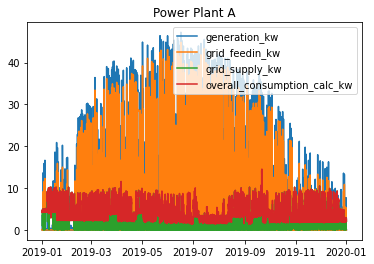

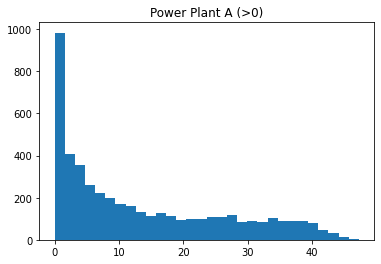

In [6]:
power_plant_columns = ["generation_kw", "grid_feedin_kw", "grid_supply_kw", "overall_consumption_calc_kw"]

plt.plot(df[power_plant_columns])
plt.title("Power Plant A")
plt.legend(power_plant_columns)
plt.show()

target = "generation_kw"

plt.hist(df[target]
    , bins = 30
    , range = (0.0001, max(df[target]))
    )
plt.title("Power Plant A (>0)")
plt.show()

## Pre Process Weather Data + Visualization

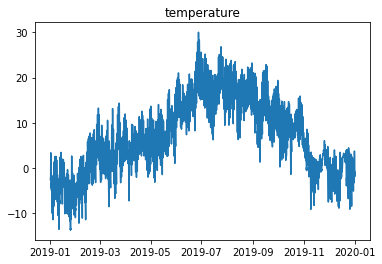

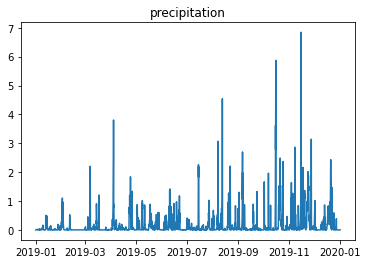

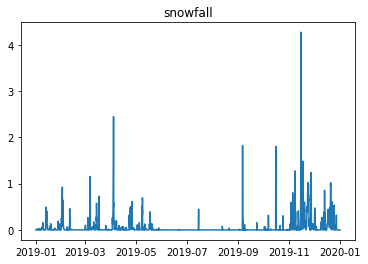

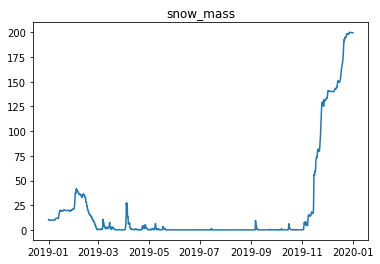

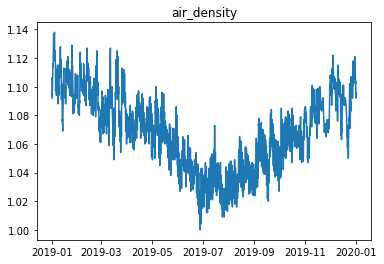

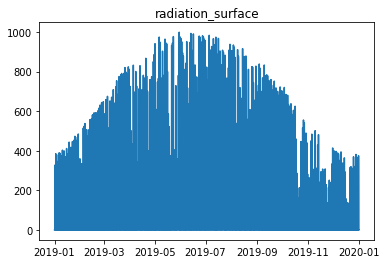

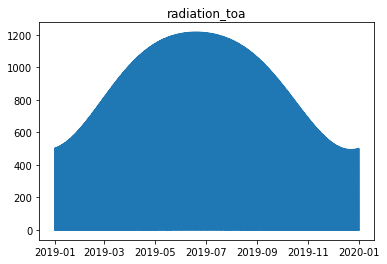

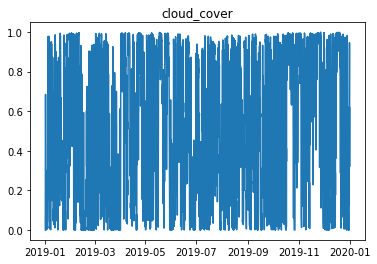

In [7]:
plt.plot(df["temperature"])
plt.title("temperature")
plt.show()

plt.plot(df["precipitation"])
plt.title("precipitation")
plt.show()

plt.plot(df["snowfall"])
plt.title("snowfall")
plt.show()

plt.plot(df["snow_mass"])
plt.title("snow_mass")
plt.show()

plt.plot(df["air_density"])
plt.title("air_density")
plt.show()

plt.plot(df["radiation_surface"])
plt.title("radiation_surface")
plt.show()

plt.plot(df["radiation_toa"])
plt.title("radiation_toa")
plt.show()

plt.plot(df["cloud_cover"])
plt.title("cloud_cover")
plt.show()

## Prepare Data for a simple Linear Regression
To Do:
- Daten der Power Plants mit den Wetterdaten verbinden
- Daten pro Power Plant in Test und Validation Set splitten
- Simples Regressionsmodell erstellen
- Regressionsmodell testen
- Sobald das Regressionsmodell genügt -> Output predicten und neues DF generieren (actual output, Works properly)

#### Merge Power Plant and Weather Data

#### split data

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [9]:
print(len(df))
print(len(df_train))
print(len(df_test))

8759
7007
1752


#### Create Linear Regression Model

Create a simple Regression Model with all possible input data

In [10]:
# use features that have no multicollinearity but are relevant considered the correlation matrix

features = ["temperature", "precipitation", "radiation_surface"]

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

regressor_OLS=sm.OLS(endog = y_train, exog = X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          generation_kw   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                          1.415e+04
Date:                Wed, 27 May 2020   Prob (F-statistic):                        0.00
Time:                        14:08:05   Log-Likelihood:                         -21370.
No. Observations:                7007   AIC:                                  4.275e+04
Df Residuals:                    7004   BIC:                                  4.277e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
temperature           0.1246      0.008     15.817      0.000       0.109       0.140
precipitation         0.1018      0.150      0.679      0.497      -0.192       0.396
radiation_surface     0.0376      0.000    140.116      0.000       0.037       0.038
==============================================================================
Omnibus:                      846.995   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8999.420
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                       8.549   Cond. No.                         760.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
print("The model degree of freedom: ",regressor_OLS.df_model)
print("The residual degree of freedom: ", sum(regressor_OLS.resid)/len(regressor_OLS.resid))
print("-"*20, "\n")

y_predict_ols = regressor_OLS.predict(X_test)
print("Average predicted generation_kw: ", sum(y_predict_ols)/ len(y_predict_ols))
print("Average actual generation_kw: ", sum(y_test)/ len(y_test))
print("Factor of Difference in prediction: ", (sum(y_predict_ols)/ len(y_predict_ols)) / (sum(y_test)/ len(y_test)))


The model degree of freedom:  3.0
The residual degree of freedom:  -0.35344490713039656
-------------------- 

Average predicted generation_kw:  7.44058706087308
Average actual generation_kw:  6.9346318493150685
Factor of Difference in prediction:  1.0729606448549946


Make a Prediction for the whole dataset and create a new pandas dataframe with only the acutal value and the predicted value

In [12]:
df_predict_actual = pd.DataFrame(df.copy()[target])
df_predict_actual["prediction"] = regressor_OLS.predict(df[features])

Make all prediction below 0 to 0 (as there can't be any value below 0)

In [13]:
df_predict_actual["prediction"] = df_predict_actual["prediction"].apply(lambda x: 0 if x <= 0 else x)


Plot the data

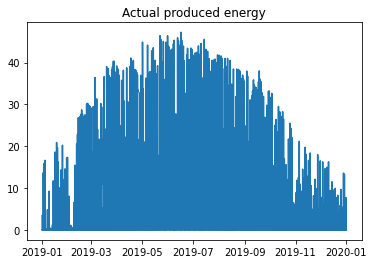

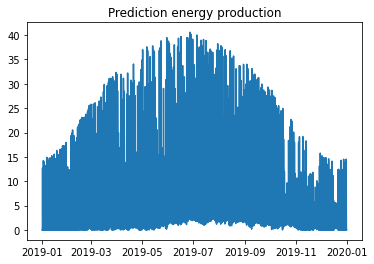

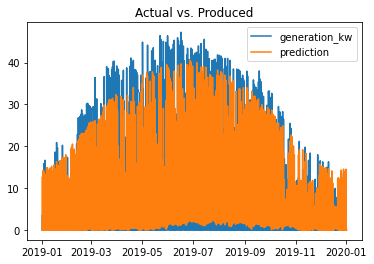

In [14]:
plt.plot(df_predict_actual[target])
plt.title("Actual produced energy")
plt.show()
plt.plot(df_predict_actual["prediction"])
plt.title("Prediction energy production")
plt.show()
plt.plot(df_predict_actual)
plt.legend(df_predict_actual.columns)
plt.title("Actual vs. Produced")
plt.show()

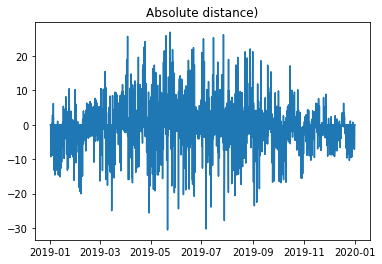

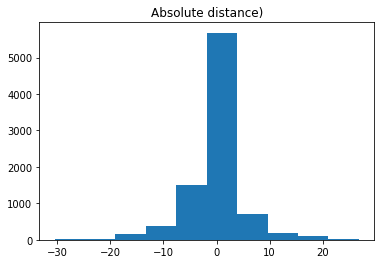

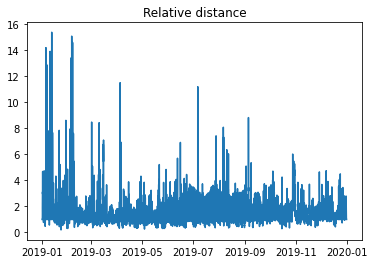

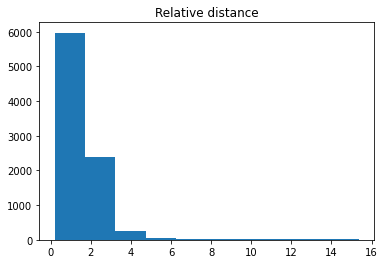

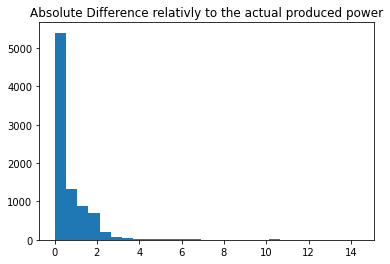

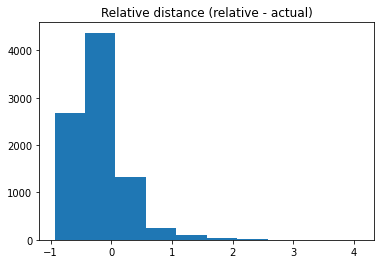

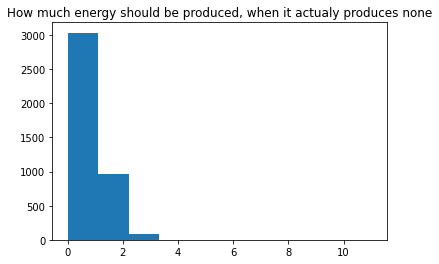

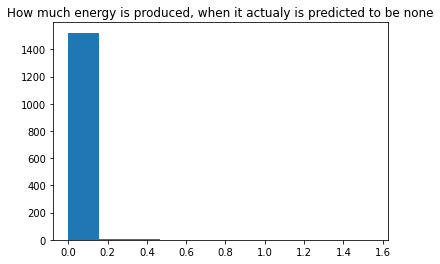

In [15]:
plt.plot( df_predict_actual[target]- df_predict_actual["prediction"])
plt.title("Absolute distance)")
plt.show()

plt.hist(df_predict_actual[target]- df_predict_actual["prediction"])
plt.title("Absolute distance)")
plt.show()

# relative difference (lambda to avoid division by 0)
plt.plot(
    df_predict_actual["prediction"].apply(lambda x: x+1)
    / df_predict_actual[target].apply(lambda x: x+1)
)
plt.title("Relative distance")
plt.show()

plt.hist(
    df_predict_actual["prediction"].apply(lambda x: x+1)
    / df_predict_actual[target].apply(lambda x: x+1)
)
plt.title("Relative distance")
plt.show()

plt.hist(
    (df_predict_actual[target]- df_predict_actual["prediction"]).abs()
    / df_predict_actual[target].apply(lambda x: x+1)
    , bins = 27
)
plt.title("Absolute Difference relativly to the actual produced power")
plt.show()

plt.hist(
    (df_predict_actual[target]- df_predict_actual["prediction"])
    / df_predict_actual["prediction"].apply(lambda x: x+1)
)
plt.title("Relative distance (relative - actual)")
plt.show()


plt.hist(
    df_predict_actual["prediction"].loc[df_predict_actual[target] == 0]
)
plt.title("How much energy should be produced, when it actualy produces none")
plt.show()

plt.hist(
    df_predict_actual[target].loc[df_predict_actual["prediction"] == 0]
)
plt.title("How much energy is produced, when it actualy is predicted to be none")
plt.show()


Bei den obrigen Grafiken ist ersichtlich, dass es schwierig ist ein Verhältnis zu finden, bei dem der produzierte Wert stark vom prognostizierten abweicht 
und so ein Fehler vorliegen muss. Aber es zeigt sich, dass es vorkommt, dass die PV nichts produziert, obwohl es laut prediction etwas produzieren sollte. 
Umgekehrt wird nichts produziert, wenn die Prognose auch sagt, dass nichts produziert werden sollte. 

-> Daher werden die Werte als not working gelabeled, bei denen nichts produziert wird, obwohl das MOdell sagt, dass etwas produziert werden sollte.

## New markdown cell

In [16]:
#df_predict_actual.drop('label_machine_working', axis=1, inplace=True)
df_predict_actual['label_machine_working'] = df_predict_actual["prediction"].loc[df_predict_actual[target] == 0].apply(lambda x: x <= 1)
df_predict_actual['label_machine_working'].fillna(value=True, inplace=True)


In [17]:
df_predict_actual

,generation_kw,prediction,label_machine_working
timestamp_utc,,,
2019-01-01 00:00:00+00:00,0.0,0.0,True
2019-01-01 01:00:00+00:00,0.0,0.0,True
2019-01-01 02:00:00+00:00,0.0,0.0,True
2019-01-01 03:00:00+00:00,0.0,0.0,True
2019-01-01 04:00:00+00:00,0.0,0.0,True
...,...,...,...
2019-12-31 18:00:00+00:00,0.0,0.0,True
2019-12-31 19:00:00+00:00,0.0,0.0,True
2019-12-31 20:00:00+00:00,0.0,0.0,True


In [18]:
print("True values: ", len(df_predict_actual.loc[df_predict_actual['label_machine_working'] == True]))
print("False values: ", len(df_predict_actual.loc[df_predict_actual['label_machine_working'] == False]))
print("Ratio: ", len(df_predict_actual.loc[df_predict_actual['label_machine_working'] == False]) / len(df_predict_actual))

True values:  7590
False values:  1169
Ratio:  0.13346272405525744


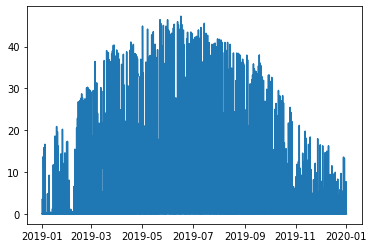

In [19]:
plt.plot(df_predict_actual[target]
    , label=df_predict_actual["label_machine_working"]
)

In [20]:
# only regard a certain number of consecutive failures as "real" failures

consecutive_failure_threshold = 9

df_predict_actual["cumulative_consecutive_count_for_machine_working_label"] = (df_predict_actual.groupby(
    (df_predict_actual['label_machine_working'] != df_predict_actual['label_machine_working'].shift()).cumsum())
                                    .cumcount())

# show "real" failures
df_predict_actual.query('label_machine_working == False & cumulative_consecutive_count_for_machine_working_label > @consecutive_failure_threshold')

,generation_kw,prediction,label_machine_working,cumulative_consecutive_count_for_machine_working_label
timestamp_utc,,,,
2019-09-02 04:00:00+00:00,0.0,1.497849,False,10
2019-09-13 04:00:00+00:00,0.0,1.298144,False,10
2019-09-14 04:00:00+00:00,0.0,1.480460,False,10
2019-09-15 04:00:00+00:00,0.0,1.541623,False,10
2019-09-16 04:00:00+00:00,0.0,1.317697,False,10
2019-09-17 04:00:00+00:00,0.0,1.331580,False,10
2019-09-18 04:00:00+00:00,0.0,1.352478,False,10
2019-09-19 04:00:00+00:00,0.0,1.244999,False,10
2019-09-25 04:00:00+00:00,0.0,1.003456,False,10
